In [12]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [231]:
%matplotlib inline
import os
import re
import matplotlib.pyplot as plt
from PIL import Image

import numpy as np
import pandas as pd

import torch
import torchvision
import torchvision.transforms as transforms



In [242]:
def imshow(img,text=None,should_save=False):
    npimg = np.asarray(img)#.numpy()
    plt.axis("off")
    if text:
        plt.text(75, 8, text, style='italic',fontweight='bold',
            bbox={'facecolor':'white', 'alpha':0.8, 'pad':10})
    # npimg = np.transpose(npimg, (1, 2, 0))
    plt.imshow(npimg)
    plt.show()    


# Get Annotations

In [243]:
dataset_path = "data/celebA/Img/img_align_celeba"
id_file = "data/celebA/identity_CelebA.txt"
attr_file = "data/celebA/list_attr_celeba.txt"
bbox_file = "data/celebA/list_bbox_celeba.txt"

In [244]:
df_identity = pd.read_csv(id_file,sep=" ",header=None)
df_identity

,0,1
0,000001.jpg,2880
1,000002.jpg,2937
2,000003.jpg,8692
3,000004.jpg,5805
4,000005.jpg,9295
...,...,...
202594,202595.jpg,9761
202595,202596.jpg,7192
202596,202597.jpg,9852
202597,202598.jpg,5570


In [245]:
!head $attr_file

202599
5_o_Clock_Shadow Arched_Eyebrows Attractive Bags_Under_Eyes Bald Bangs Big_Lips Big_Nose Black_Hair Blond_Hair Blurry Brown_Hair Bushy_Eyebrows Chubby Double_Chin Eyeglasses Goatee Gray_Hair Heavy_Makeup High_Cheekbones Male Mouth_Slightly_Open Mustache Narrow_Eyes No_Beard Oval_Face Pale_Skin Pointy_Nose Receding_Hairline Rosy_Cheeks Sideburns Smiling Straight_Hair Wavy_Hair Wearing_Earrings Wearing_Hat Wearing_Lipstick Wearing_Necklace Wearing_Necktie Young 
000001.jpg -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1  1 -1 -1  1 -1 -1  1 -1 -1 -1  1  1 -1  1 -1  1 -1 -1  1
000002.jpg -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1
000003.jpg -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1
000004.jpg -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1  1  1 -1  1
0000

In [246]:
df_attr = pd.read_csv(attr_file,sep="\s+",header=0, skiprows=1)
df_attr['img'] = df_attr.index
df_attr = df_attr.reset_index(drop=True)
df_attr


,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young,img
0,-1,1,1,-1,-1,-1,-1,-1,-1,-1,...,1,1,-1,1,-1,1,-1,-1,1,000001.jpg
1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,...,1,-1,-1,-1,-1,-1,-1,-1,1,000002.jpg
2,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,1,-1,-1,-1,-1,-1,1,000003.jpg
3,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,-1,1,-1,1,1,-1,1,000004.jpg
4,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,1,-1,-1,1,000005.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202594,-1,-1,1,-1,-1,-1,1,-1,-1,1,...,-1,-1,-1,-1,-1,1,-1,-1,1,202595.jpg
202595,-1,-1,-1,-1,-1,1,1,-1,-1,1,...,1,1,-1,-1,-1,-1,-1,-1,1,202596.jpg
202596,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,...,1,-1,-1,-1,-1,-1,-1,-1,1,202597.jpg
202597,-1,1,1,-1,-1,-1,1,-1,1,-1,...,1,-1,1,1,-1,1,-1,-1,1,202598.jpg


In [247]:
df_data = df_identity.merge(df_attr, how='outer', left_on=0, right_on='img')

In [248]:
df_data

,0,1,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,...,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young,img
0,000001.jpg,2880,-1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,1,-1,1,-1,-1,1,000001.jpg
1,000002.jpg,2937,-1,-1,-1,1,-1,-1,-1,1,...,1,-1,-1,-1,-1,-1,-1,-1,1,000002.jpg
2,000003.jpg,8692,-1,-1,-1,-1,-1,-1,1,-1,...,-1,-1,1,-1,-1,-1,-1,-1,1,000003.jpg
3,000004.jpg,5805,-1,-1,1,-1,-1,-1,-1,-1,...,-1,1,-1,1,-1,1,1,-1,1,000004.jpg
4,000005.jpg,9295,-1,1,1,-1,-1,-1,1,-1,...,-1,-1,-1,-1,-1,1,-1,-1,1,000005.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202594,202595.jpg,9761,-1,-1,1,-1,-1,-1,1,-1,...,-1,-1,-1,-1,-1,1,-1,-1,1,202595.jpg
202595,202596.jpg,7192,-1,-1,-1,-1,-1,1,1,-1,...,1,1,-1,-1,-1,-1,-1,-1,1,202596.jpg
202596,202597.jpg,9852,-1,-1,-1,-1,-1,-1,-1,-1,...,1,-1,-1,-1,-1,-1,-1,-1,1,202597.jpg
202597,202598.jpg,5570,-1,1,1,-1,-1,-1,1,-1,...,1,-1,1,1,-1,1,-1,-1,1,202598.jpg


In [249]:
df_data.columns

Index([                    0,                     1,    '5_o_Clock_Shadow',
           'Arched_Eyebrows',          'Attractive',     'Bags_Under_Eyes',
                      'Bald',               'Bangs',            'Big_Lips',
                  'Big_Nose',          'Black_Hair',          'Blond_Hair',
                    'Blurry',          'Brown_Hair',      'Bushy_Eyebrows',
                    'Chubby',         'Double_Chin',          'Eyeglasses',
                    'Goatee',           'Gray_Hair',        'Heavy_Makeup',
           'High_Cheekbones',                'Male', 'Mouth_Slightly_Open',
                  'Mustache',         'Narrow_Eyes',            'No_Beard',
                 'Oval_Face',           'Pale_Skin',         'Pointy_Nose',
         'Receding_Hairline',         'Rosy_Cheeks',           'Sideburns',
                   'Smiling',       'Straight_Hair',           'Wavy_Hair',
          'Wearing_Earrings',         'Wearing_Hat',    'Wearing_Lipstick',
          'W

In [250]:
df_bbox = pd.read_csv(bbox_file,sep="\s+",header=0, skiprows=1)
df_bbox = df_bbox.reset_index(drop=True)
df_bbox


,image_id,x_1,y_1,width,height
0,000001.jpg,95,71,226,313
1,000002.jpg,72,94,221,306
2,000003.jpg,216,59,91,126
3,000004.jpg,622,257,564,781
4,000005.jpg,236,109,120,166
...,...,...,...,...,...
202594,202595.jpg,1381,91,221,306
202595,202596.jpg,137,129,114,158
202596,202597.jpg,53,76,91,126
202597,202598.jpg,195,28,91,126


In [251]:
df_all = df_data.merge(df_bbox, how='outer', left_on='img', right_on='image_id')
df_all

,0,1,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,...,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young,img,image_id,x_1,y_1,width,height
0,000001.jpg,2880,-1,1,1,-1,-1,-1,-1,-1,...,1,-1,-1,1,000001.jpg,000001.jpg,95,71,226,313
1,000002.jpg,2937,-1,-1,-1,1,-1,-1,-1,1,...,-1,-1,-1,1,000002.jpg,000002.jpg,72,94,221,306
2,000003.jpg,8692,-1,-1,-1,-1,-1,-1,1,-1,...,-1,-1,-1,1,000003.jpg,000003.jpg,216,59,91,126
3,000004.jpg,5805,-1,-1,1,-1,-1,-1,-1,-1,...,1,1,-1,1,000004.jpg,000004.jpg,622,257,564,781
4,000005.jpg,9295,-1,1,1,-1,-1,-1,1,-1,...,1,-1,-1,1,000005.jpg,000005.jpg,236,109,120,166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202594,202595.jpg,9761,-1,-1,1,-1,-1,-1,1,-1,...,1,-1,-1,1,202595.jpg,202595.jpg,1381,91,221,306
202595,202596.jpg,7192,-1,-1,-1,-1,-1,1,1,-1,...,-1,-1,-1,1,202596.jpg,202596.jpg,137,129,114,158
202596,202597.jpg,9852,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,1,202597.jpg,202597.jpg,53,76,91,126
202597,202598.jpg,5570,-1,1,1,-1,-1,-1,1,-1,...,1,-1,-1,1,202598.jpg,202598.jpg,195,28,91,126


In [252]:
df_data_flt = df_all[[1,'img','Young','Heavy_Makeup','5_o_Clock_Shadow','Male','x_1','y_1','width','height']].groupby([1]).filter(lambda df:df.Young.nunique()<=1)

df_data_flt = df_data_flt.rename(columns={1:'ids'})[['img','ids']].reset_index(drop=True)

In [253]:
df_data_flt.nunique()
df_data_flt

img    155839
ids      8258
dtype: int64

,img,ids
0,000005.jpg,9295
1,000006.jpg,4153
2,000007.jpg,9040
3,000009.jpg,3332
4,000010.jpg,612
...,...,...
155834,202591.jpg,8985
155835,202592.jpg,7824
155836,202593.jpg,10139
155837,202594.jpg,8984


In [255]:
ids_random = np.random.permutation(df_data_flt.ids.unique())


In [256]:
val = ids_random[:200]
ids_random = ids_random[200:]

test = ids_random[:50]
ids_random = ids_random[50:]

train = ids_random

In [257]:
len(train), len(val), len(test)

(8008, 200, 50)

In [259]:
df_data_flt[df_data_flt.ids.isin(train)]

,img,ids
0,000005.jpg,9295
1,000006.jpg,4153
2,000007.jpg,9040
3,000009.jpg,3332
4,000010.jpg,612
...,...,...
155834,202591.jpg,8985
155835,202592.jpg,7824
155836,202593.jpg,10139
155837,202594.jpg,8984


In [260]:
datafilt_train = df_data_flt[df_data_flt.ids.isin(train)]
datafilt_train.to_csv('data/celebA/identity_CelebA_filt.train.csv',index=False)

datafilt_test = df_data_flt[df_data_flt.ids.isin(test)]
datafilt_test.to_csv('data/celebA/identity_CelebA_filt.test.csv',index=False)

datafilt_val = df_data_flt[df_data_flt.ids.isin(val)]
datafilt_val.to_csv('data/celebA/identity_CelebA_filt.val.csv',index=False)

In [267]:
datafilt_val.ids.nunique(), len(datafilt_val)
datafilt_test.ids.nunique(), len(datafilt_test)
datafilt_train.ids.nunique(), len(datafilt_train)

(200, 3755)

(50, 916)

(8008, 151168)

# Visualize Images

In [164]:
image_mean = np.array([0.485, 0.456, 0.406 ])
image_std = np.array([0.229, 0.224, 0.225])

In [165]:
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize(
                                    mean=image_mean,
                                    std=image_std)])
inv_normalize = transforms.Normalize(
    mean=-image_mean/image_std,
    std=1/image_std
)

In [181]:
_id=9040
_df = df_data_flt[df_data_flt[1] == _id].reset_index(drop=True)

In [182]:
_df

,1,img,Young,Heavy_Makeup,5_o_Clock_Shadow,Male,x_1,y_1,width,height
0,9040,000007.jpg,1,-1,1,1,64,93,211,292
1,9040,008201.jpg,1,-1,-1,1,81,99,179,248
2,9040,013638.jpg,1,-1,-1,1,32,51,166,230
3,9040,015336.jpg,1,-1,1,1,27,81,291,403
4,9040,025883.jpg,1,-1,1,1,83,176,315,421
5,9040,033472.jpg,1,-1,1,1,133,86,255,353
6,9040,043155.jpg,1,-1,1,1,391,118,192,266
7,9040,043521.jpg,1,-1,-1,1,143,57,107,148
8,9040,045445.jpg,1,-1,1,1,54,110,257,356
9,9040,046906.jpg,1,-1,1,1,116,51,148,205


In [184]:
images = []
for i in range(8):
    im = Image.open(os.path.join(dataset_path,_df.iloc[i]['img'])).convert("RGB")
    images.append(transform(im))


<Figure size 2000x3000 with 0 Axes>

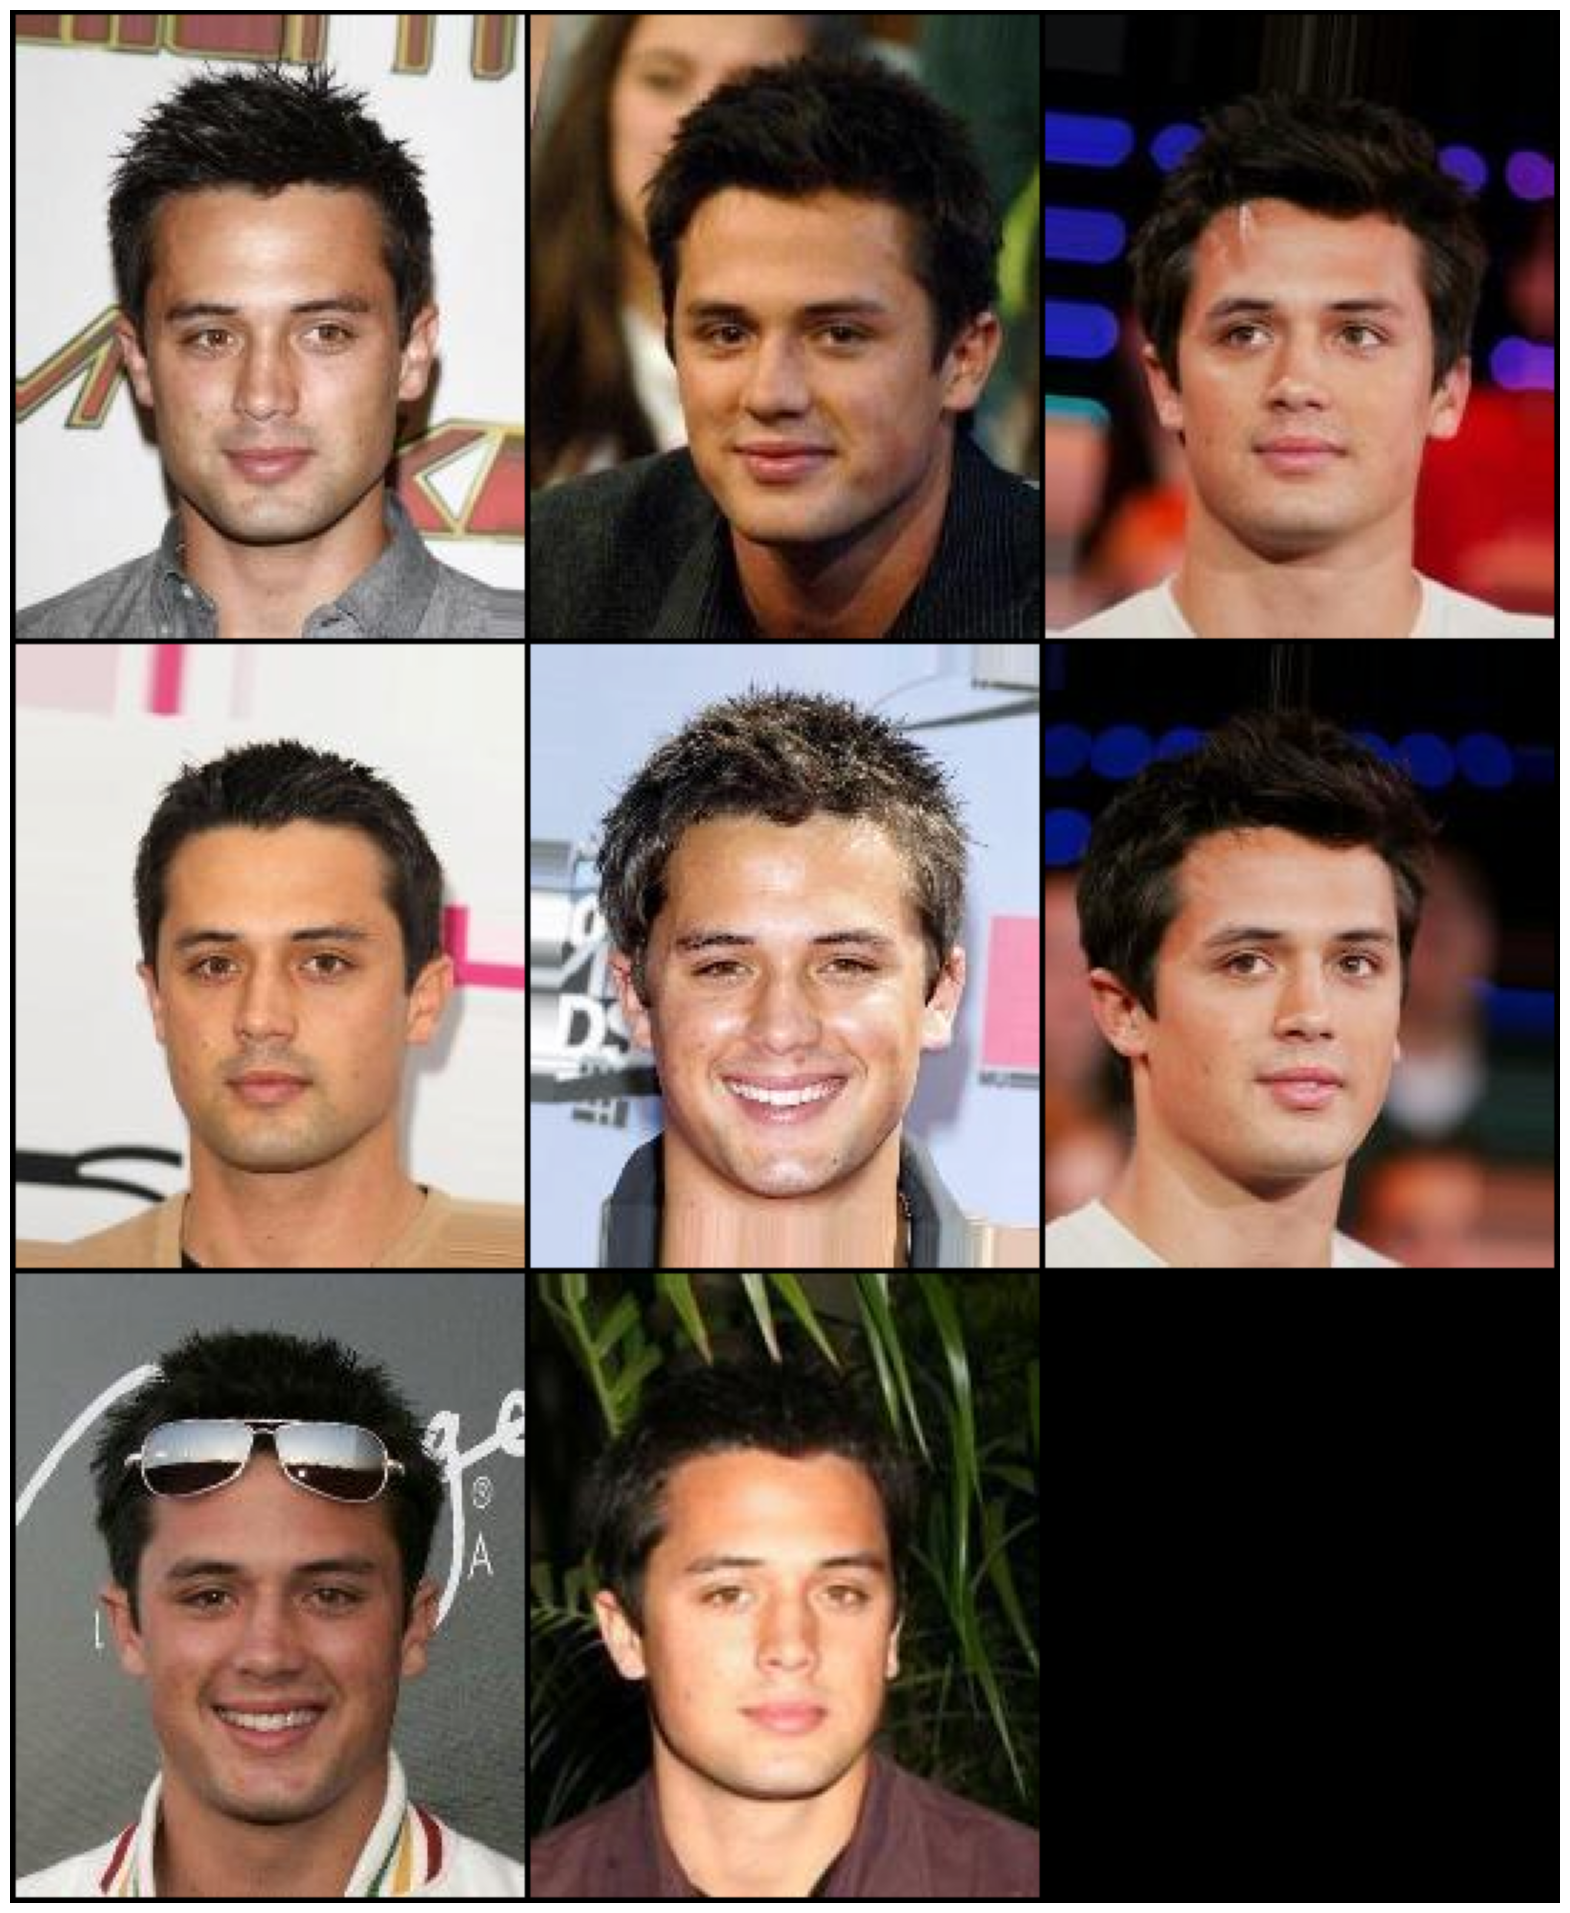

In [185]:
plt.figure(figsize=(20,30))
concatenated = torch.stack(images)
imshow(torchvision.utils.make_grid(inv_normalize(concatenated),nrow=3).permute(1,2,0))
# transform(im).permute(1,2,0)
